In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov = 0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state = None
                       )

X, Y = gaussian_quantiles

In [3]:
Y = Y[:, np.newaxis]

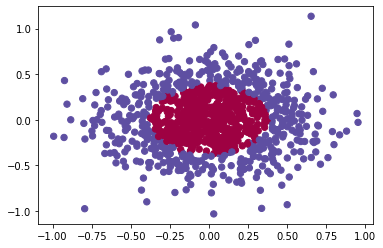

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

#### Funciones de activacion

In [5]:
def sigmoid(a, derivate=False):
    if derivate:
        return np.exp(-a)/((np.exp(-a)+1)**2)
    else:
        return 1 / (1+np.exp(-a))
    
def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

#### Funcion de perdida

In [6]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

In [7]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
        parameters['b'+str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
    return parameters

In [8]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [9]:
params

{'W1': array([[ 0.49598228,  0.75390713, -0.34761649,  0.45287247],
        [ 0.28916853, -0.81516608, -0.1103077 , -0.04346204]]),
 'b1': array([[ 0.84546425, -0.28947588, -0.26895455, -0.31814255]]),
 'W2': array([[-0.9546189 ,  0.89250442,  0.73056906,  0.96852077,  0.35830566,
          0.00677474, -0.08542737, -0.58579038],
        [ 0.95878047,  0.20592007,  0.16824486, -0.21909931, -0.25471833,
         -0.73005566, -0.3351547 ,  0.07642681],
        [-0.81370571, -0.75870053, -0.08311259, -0.11687856,  0.55238696,
          0.23336561, -0.42472266,  0.65212916],
        [-0.36314103, -0.16577095,  0.32250432, -0.17238639, -0.05949455,
          0.06758332,  0.38612143, -0.21505843]]),
 'b2': array([[-0.97038203, -0.11325444,  0.49237105,  0.87442146, -0.6520365 ,
          0.67485189,  0.63620917, -0.5123779 ]]),
 'W3': array([[-0.91484551],
        [-0.3852986 ],
        [ 0.48342361],
        [ 0.9499202 ],
        [-0.43821114],
        [ 0.43140891],
        [-0.09499667],
